# ロジスティック回帰
## L2ペナルティ
## solver:Stocastic Average Gradient
### 参考: http://d.hatena.ne.jp/kisa12012/20121209/1355053868

# todo
## max_iter回必ず回すようにしているが、誤差が一定値以下になったら止めるようにしたい
## sag以外も実装suruそのうち

0.4168268797397631


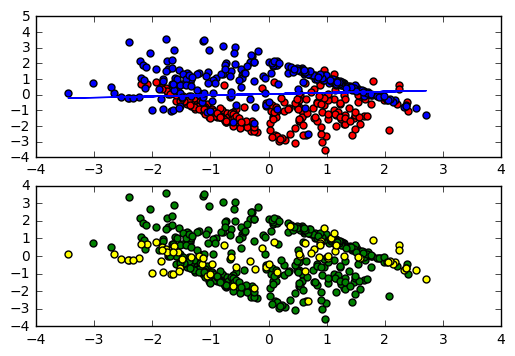

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification


class logisticRegression(object):
    def __init__(self, eta=0.1, alpha=0.1, max_iter=100):
        # eta: 勾配法の係数
        # alpha: L2正則化の係数
        self.eta = eta
        self.alpha = alpha
        self.w = None
        self.gradient = None
        self.max_iter = max_iter

    def addBias(self, x):
        b = np.ones(x.shape[0])
        v = np.column_stack((b, x))
        return v        

    def calc_p(self, x):
        # 1/(1+e^(-wx))
        return 1.0 / (1.0 + np.exp(-np.dot(self.w, x)))
    
    def getSingleGradient(self, x, y):
        val1 = self.calc_p(x)
        val2 = val1 - y
        return val2
    
    def getGradient(self, X):
        val0 = np.array([self.gradient[k] * X[k] for k in range(X.shape[0])])
        val1 = val0.sum(axis=0) / self.gradient.shape
        val2 = self.alpha * self.w
        return val1 + val2
    
    def fit(self, x, y):
        # x: (n_samples, n_features)
        # y: (n_samples)
        X = self.addBias(x)
        self.w = np.zeros(X.shape[1])
        self.gradient = np.zeros(X.shape[0])
        for iter in range(self.max_iter):
            for j in range(X.shape[0]):
                self.gradient[j] = self.getSingleGradient(X[j], y[j])
                self.w = self.w - self.eta * self.getGradient(X)

    def predict_proba(self, x):
        X = self.addBias(x)
        ret = [self.calc_p(v) for v in X]
        return np.array(ret)
        
    def predict(self, x):
        X = self.addBias(x)
        pred = [np.dot(self.w, v) for v in X]
        pred = [0 if v < 0 else 1 for v in pred]
        return pred
    
    def score(self, x, y):
        proba = self.predict_proba(x)
        score = np.sum([y[i]*np.log(proba[i])+(1-y[i])*np.log(1-proba[i]) for i in range(y.shape[0])]) / y.shape[0]
        return -score

x, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0)
clf = logisticRegression()
clf.fit(x, y)
score = clf.score(x, y)
print(score)

# plot
weight = clf.w
yy = (x[:, 0] * weight[1] + weight[0]) / weight[2]
yy = [np.nan if (v > 4 or v < -4) else v for v in yy]
pred = clf.predict(x)
pred_valid = np.array([x[i] for i in range(x.shape[0]) if pred[i] == y[i]])
pred_fail = np.array([x[i] for i in range(x.shape[0]) if pred[i] != y[i]])
red = np.array([x[i] for i in range(x.shape[0]) if y[i] == 0])
blue = np.array([x[i] for i in range(x.shape[0]) if y[i] == 1])
plt.subplot(2, 1, 1)
plt.scatter(red[:, 0], red[:, 1], color='red', marker='o', s=25, edgecolor='k')
plt.scatter(blue[:, 0], blue[:, 1], color='blue', marker='o', s=25, edgecolor='k')
plt.plot(x[:, 0], yy)
plt.subplot(2, 1, 2)
plt.scatter(pred_valid[:, 0], pred_valid[:, 1], color='green', marker='o', s=25, edgecolor='k')
plt.scatter(pred_fail[:, 0], pred_fail[:, 1], color='yellow', marker='o', s=25, edgecolor='k')
plt.show()